In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('Classified Data.csv',index_col=0)

In [4]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


Text(0.5, 1.0, 'Main Data')

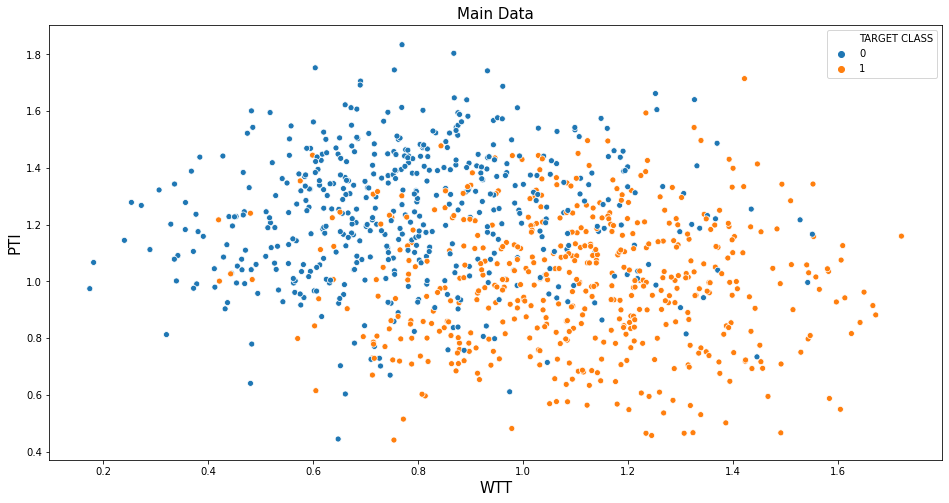

In [5]:
# plotting main data
import seaborn as sns
fig = plt.figure(figsize=(16,8))
ax2 = fig.add_subplot(1, 1, 1)
ax2=sns.scatterplot(df['WTT'],df['PTI'], hue=df['TARGET CLASS'])
ax2.set_xlabel('WTT', fontsize=15)
ax2.set_ylabel('PTI', fontsize=15)
ax2.set_title('Main Data', fontsize=15)

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
ss=StandardScaler()

In [8]:
df_x=df.drop('TARGET CLASS',axis=1)
ss.fit(df_x)
scaled_features=ss.transform(df_x)

In [9]:
df_scaled=pd.DataFrame(scaled_features,columns=df_x.columns)

In [10]:
#scaled data without target
df_scaled.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
df_y=df['TARGET CLASS']
[x_train,x_test,y_train,y_test]=train_test_split(df_scaled,df_y, test_size=0.25, random_state=42)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_squared_error 

In [15]:
train_accuracy=[]
test_accuracy=[]
error=[]
j=30
for i in range(1,j):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    train_accuracy.append(knn.score(x_train, y_train) )
    test_accuracy.append(knn.score(x_test, y_test) )
    error.append(mean_squared_error(y_test,pred_i) )
print('K=',error.index(min(error))+1,' has min error. error=',min(error))
print('K=',test_accuracy.index(max(test_accuracy))+1,' has max test score. score=',max(test_accuracy))
k_best=error.index(min(error))+1

K= 10  has min error. error= 0.048
K= 10  has max test score. score= 0.952


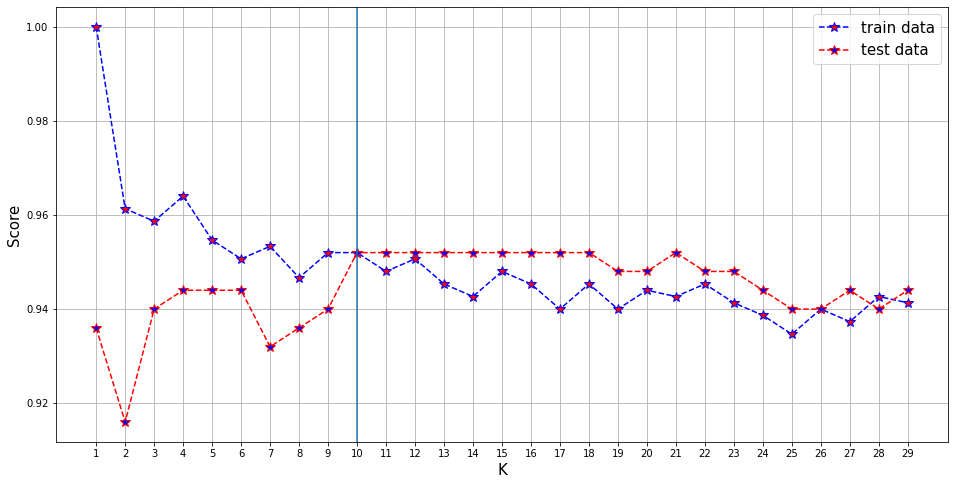

In [16]:
# plotting train_accuracy and test_accuracy
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(range(1,j),train_accuracy,linestyle='dashed',color='blue',marker='*',
         markerfacecolor='red',markersize=10, label='train data')
ax.plot(range(1,j),test_accuracy,linestyle='dashed',color='red',marker='*',
         markerfacecolor='blue',markersize=10, label='test data')
ax.set_xlabel('K', fontsize=15)
ax.legend(fontsize=15)
ax.set_ylabel('Score', fontsize=15)
minor_ticks = np.arange(1, j, 1)
ax.set_xticks(minor_ticks)
ax.grid(which='minor', alpha=0.2)
ax.grid()
ax.axvline(k_best)

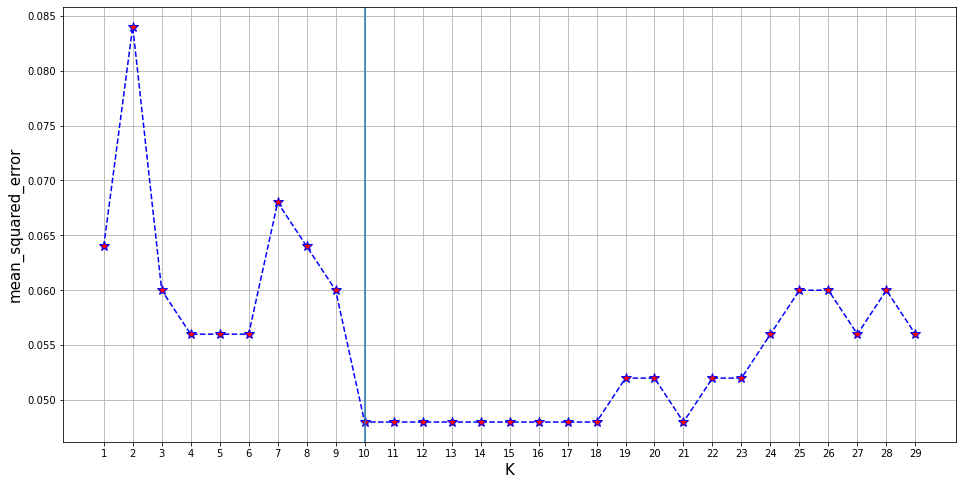

In [24]:
#plotting mean_squared_error
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(range(1,j),error,linestyle='dashed',color='blue',marker='*',
         markerfacecolor='red',markersize=10)
ax.set_xlabel('K', fontsize=15)
ax.set_ylabel('mean_squared_error', fontsize=15)
minor_ticks = np.arange(1, j, 1)
ax.set_xticks(minor_ticks)
ax.grid(which='minor', alpha=0.2)
ax.grid()
ax.axvline(k_best)

In [18]:
knn=KNeighborsClassifier(n_neighbors=k_best)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix

In [20]:
print(confusion_matrix(y_test,pred))

[[111   5]
 [  7 127]]


In [21]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       116
           1       0.96      0.95      0.95       134

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250



In [22]:
def knn_comparison(data,target,x,y, k):
    [x_train,x_test,y_train,y_test]=train_test_split(data,target, test_size=0.25, random_state=42)
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(x_train[[x,y]], y_train)
    plot_decision_regions(x_train[[x,y]].values, np.array(y_train)
                          , clf=clf, legend=2)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title("Knn with K="+ str(k))
    plt.show()

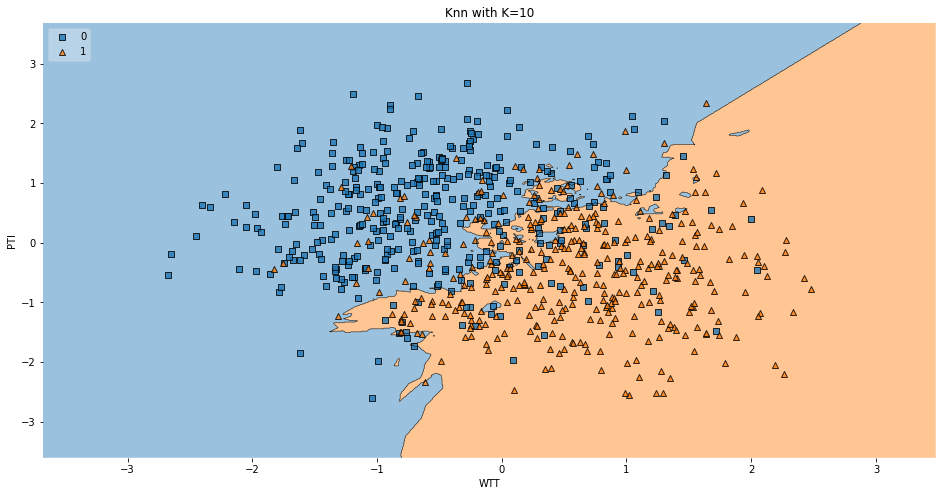

In [23]:
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
fig = plt.figure(figsize=(16,8))
knn_comparison(df_scaled,df_y,'WTT','PTI', k_best)